In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from IPython.display import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Engineering/Projects (Open)/15002 - Cempaka Mas Mall/Round 2 (2019)/4 Analysis/MnV Baseline - Chiller/Bukaka_CHW.xlsx', index_col=0)
df = df.drop('CHWS', axis=1)
df = df.drop('CHWR', axis=1)
df = df.drop('CWS', axis=1)
df = df.drop('CWR', axis=1)
df = df.drop('CWdT', axis=1)
df = df.drop('mCW', axis=1)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
df.sample(5)

,CHWdT,Lift,mCHW,Q cool,kW
CH Load,,,,,
0.3,1.5,24.00,184.416667,1160.61,197.5
0.7,3.5,24.30,184.611111,2707.00,350.0
0.5,2.5,23.22,184.611111,1934.00,257.8
0.1,0.5,23.00,184.416667,386.87,174.6
0.3,1.5,24.18,184.416667,1160.00,199.0


In [ ]:
X.shape

(30, 4)

In [ ]:
y.shape

(30,)

In [ ]:
df.corr()

,CHWdT,Lift,mCHW,Q cool,kW
CHWdT,1.000000,0.861775,0.000000,1.000000,0.968164
Lift,0.861775,1.000000,-0.502101,0.861819,0.837242
mCHW,0.000000,-0.502101,1.000000,-0.000118,0.001946
Q cool,1.000000,0.861819,-0.000118,1.000000,0.968171
kW,0.968164,0.837242,0.001946,0.968171,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)
y_norm = y/max(y)

X_norm = sm.add_constant(X_norm)
est = sm.regression.linear_model.OLS(y_norm, X_norm).fit()
coef_CHW = est.params
print(est.summary(xname = ['const','CHWdT','Lift','mCHW','Q cool']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           6.53e-16
Time:                        08:56:09   Log-Likelihood:                 47.696
No. Observations:                  30   AIC:                            -85.39
Df Residuals:                      25   BIC:                            -78.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5616      0.010     56.904      0.0

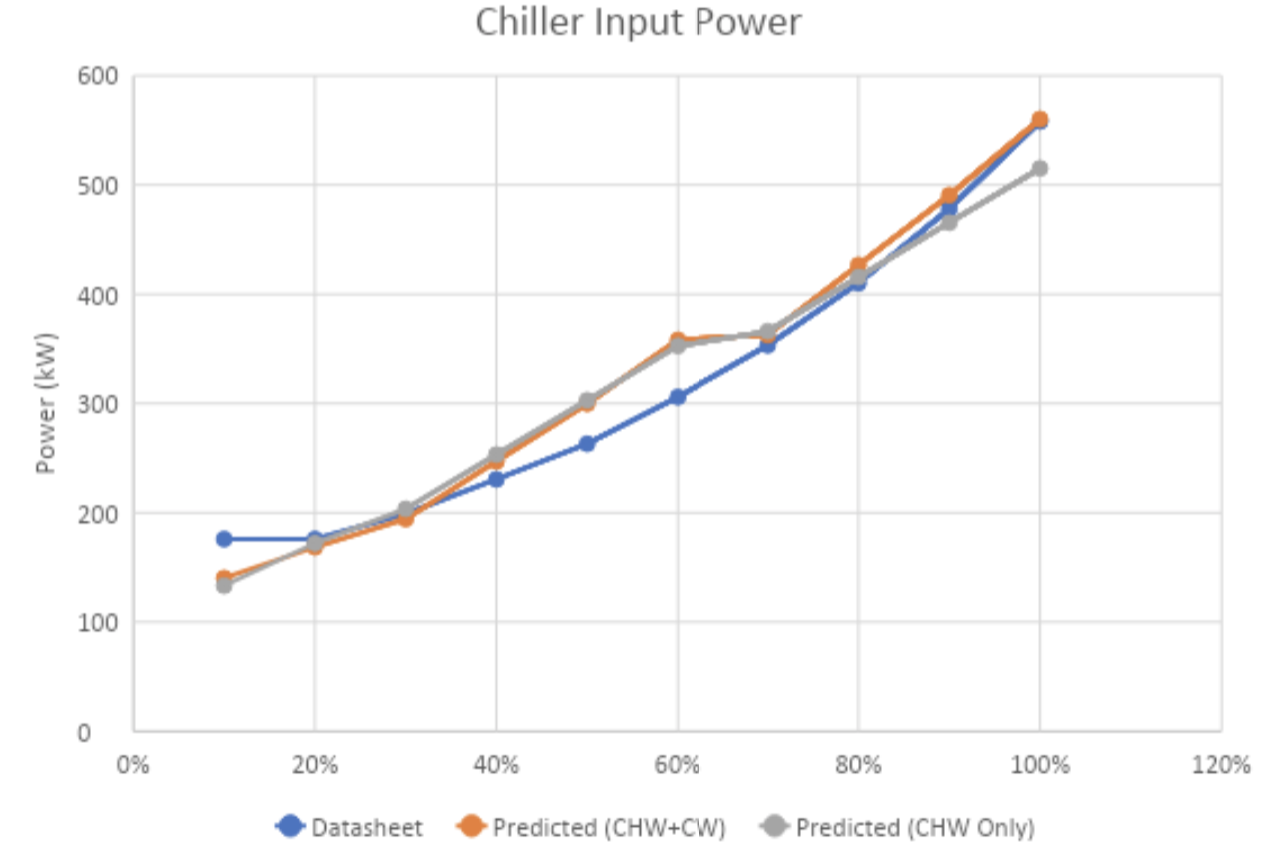

In [ ]:
Image(filename='/content/Screen Shot 2020-06-23 at 12.40.52 PM.png', width=512) 

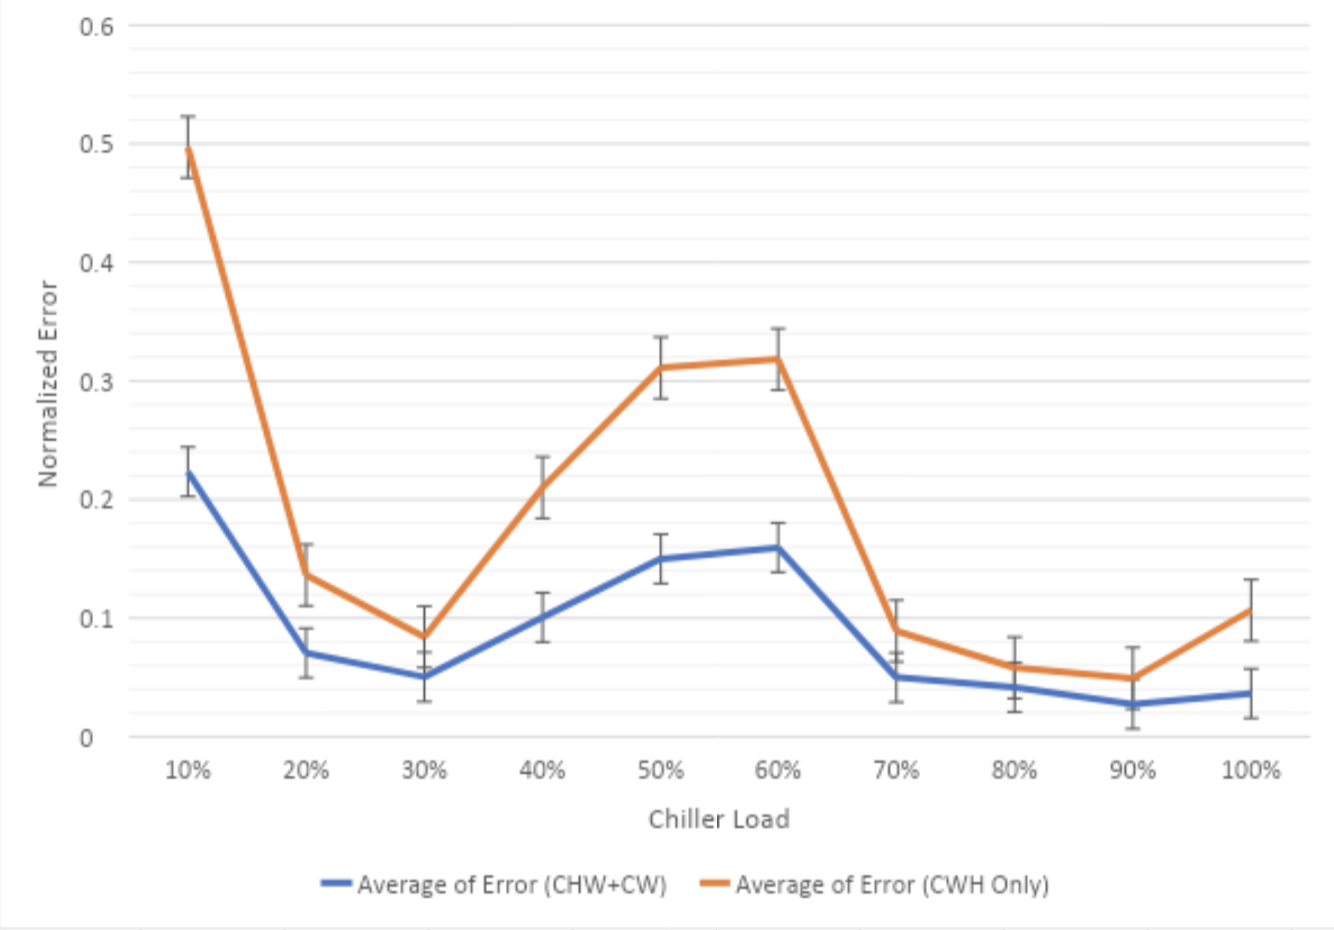

In [ ]:
Image(filename='/content/Screen Shot 2020-06-23 at 12.41.00 PM.png', width=512) 

In [ ]:
X = sm.add_constant(X)
est = sm.regression.linear_model.OLS(y, X).fit()
coef_CHW = est.params
print(est.summary(xname = ['const','CHWdT','Lift','mCHW','mCW','Q cool']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     100.7
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.68e-15
Time:                        07:31:30   Log-Likelihood:                -140.71
No. Observations:                  30   AIC:                             293.4
Df Residuals:                      24   BIC:                             301.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.391e+05   1.95e+05     -2.762      0.0

In [ ]:
X = sm.add_constant(X)
est = sm.regression.linear_model.WLS(y, X).fit()
coef_CHW = est.params
print(est.summary(xname = ['const','CHWdT','Lift','mCHW','mCW','Q cool']))

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            WLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     100.7
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.68e-15
Time:                        07:44:53   Log-Likelihood:                -140.71
No. Observations:                  30   AIC:                             293.4
Df Residuals:                      24   BIC:                             301.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.391e+05   1.95e+05     -2.762      0.0

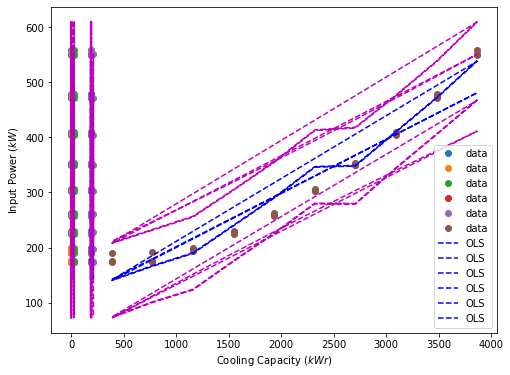

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(est)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', label="data")
ax.plot(X, est.fittedvalues, 'b--', label="OLS")
ax.plot(X, iv_u, 'm--')
ax.plot(X, iv_l, 'm--')
ax.legend(loc='lower right')
plt.xlabel('Cooling Capacity $(kWr)$')
plt.ylabel('Input Power $(kW)$');

In [ ]:
pt = pd.pivot_table(df,index=['CH Load'])
pt.columns = ['CHWdT','Lift','Q cool','kW','mCHW','mCW']
pt = pt[['Lift','Q cool','kW']]
pt

,Lift,Q cool,kW
CH Load,,,
0.1,22.446667,386.823333,180.100000
0.2,22.940000,773.580000,180.733333
0.3,23.453333,1160.203333,196.700000
0.4,23.966667,1547.160000,228.000000
0.5,24.480000,1934.116667,260.433333
0.6,25.006667,2321.073333,303.366667
0.7,25.533333,2707.363333,350.733333
0.8,26.073333,3094.320000,407.233333
0.9,26.613333,3481.276667,474.233333


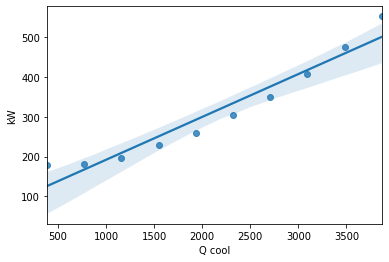

In [ ]:
sns.regplot(x='Q cool', y='kW', data=pt);

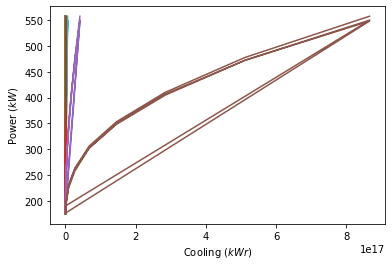

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree=5)
Xp = poly_f.fit_transform(X)
Xp.shape

poly_model = sm.OLS(y, Xp).fit()
poly_est = poly_model.predict(Xp)

plt.plot(Xp, poly_est)
plt.xlabel('Cooling ($kWr$)')
plt.ylabel('Power ($kW$)');
#LOL it doesn't work